## Task 1
Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?



In [2]:
import pandas as pd
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')
logs.platform.unique() # answer 3

array(['phone', 'computer', 'tablet'], dtype=object)

## Task 2 
Какой клиент совершил больше всего успешных операций?



In [43]:
(
    logs
     .groupby('client', as_index=False)
     .agg(successful_purchases = ('success', sum))
     .assign(max_purchases = lambda x: x.successful_purchases.max())
     .query("successful_purchases == max_purchases")
) 
# answer - 12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584

,client,successful_purchases,max_purchases
468,12179,41,41
1120,28719,41,41
1426,36165,41,41
2095,52870,41,41
2468,61468,41,41
2469,61473,41,41
3141,78349,41,41
3300,82563,41,41
3712,92584,41,41


## Task 3
С какой платформы осуществляется наибольшее количество успешных операций?



In [45]:
(
    logs
     .groupby('platform', as_index=False)
     .agg(successful_purchases = ('success', sum))
     .sort_values('successful_purchases', ascending=False)
) 
# answer - phone

,platform,successful_purchases
1,phone,2019
0,computer,1090
2,tablet,180


## Task 4
Какая платформа наиболее популярна среди премиумных клиентов?


In [61]:
(
    logs
     .merge(user_data, on='client')
     .query("premium == True")
     .groupby('platform', as_index=False)
     .agg(
         successful_purchases = ('success', sum),
         purchases = ('time', 'count')
     )
     .assign(perent = lambda x: x.successful_purchases.div(x.purchases).mul(100).round(2))
     .sort_values(by='purchases', ascending=False)
)
# answer - phone

,platform,successful_purchases,purchases,perent
1,phone,177,246,71.95
0,computer,108,150,72.00
2,tablet,18,24,75.00


## Task 5
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге

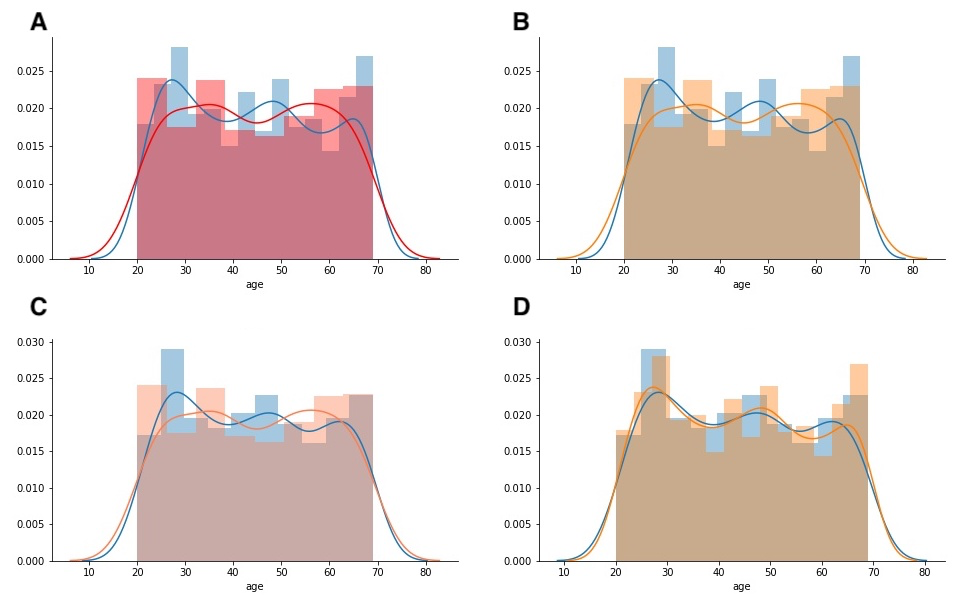


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='age', ylabel='Density'>

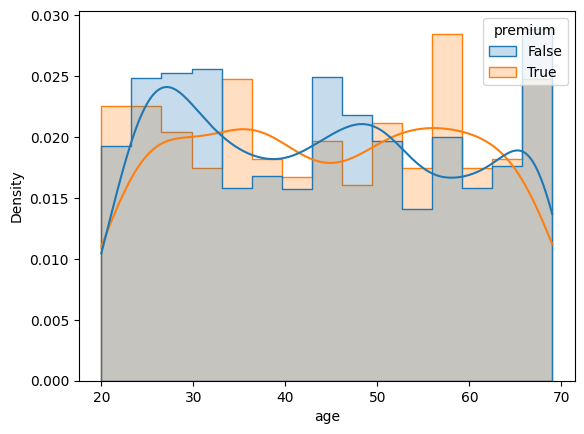

In [79]:
user_agg = (
    logs
     .merge(user_data, on='client')
)

sns.histplot(data=user_agg, x="age", hue='premium', 
             element="step", kde=True, stat='density', 
             common_norm=False)
#answer - B

## Task 6
Постройте график распределения числа успешных операций: 

 x – число успешных операций
 
 y – число клиентов, совершивших столько успешных операций


<AxesSubplot: xlabel='successful_purchases', ylabel='n_users'>

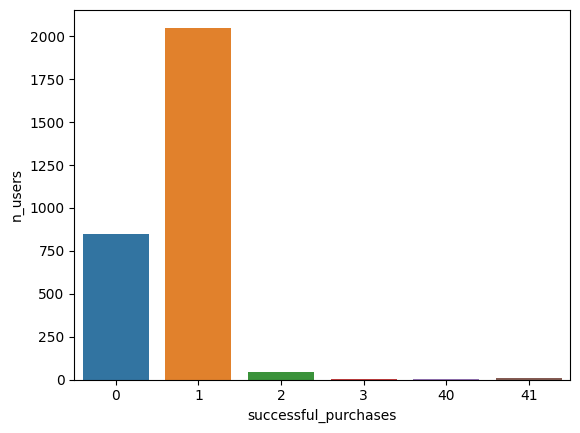

In [108]:
task_six = (
    logs
     .merge(user_data, on='client')
     .groupby('client', as_index=False)
     .agg(
         successful_purchases = ('success', sum)
     )
     .groupby('successful_purchases', as_index=False)
     .agg(
        n_users = ('client', 'count')
     )
)

sns.barplot(data=task_six, x='successful_purchases', y='n_users')
# answer 
# 1. Несколько клиентов совершили более 40 успешных действий
# 2. Бóльшая часть наблюдений сосредоточена в левой части графика

## Task 7
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

<AxesSubplot: xlabel='age', ylabel='count'>

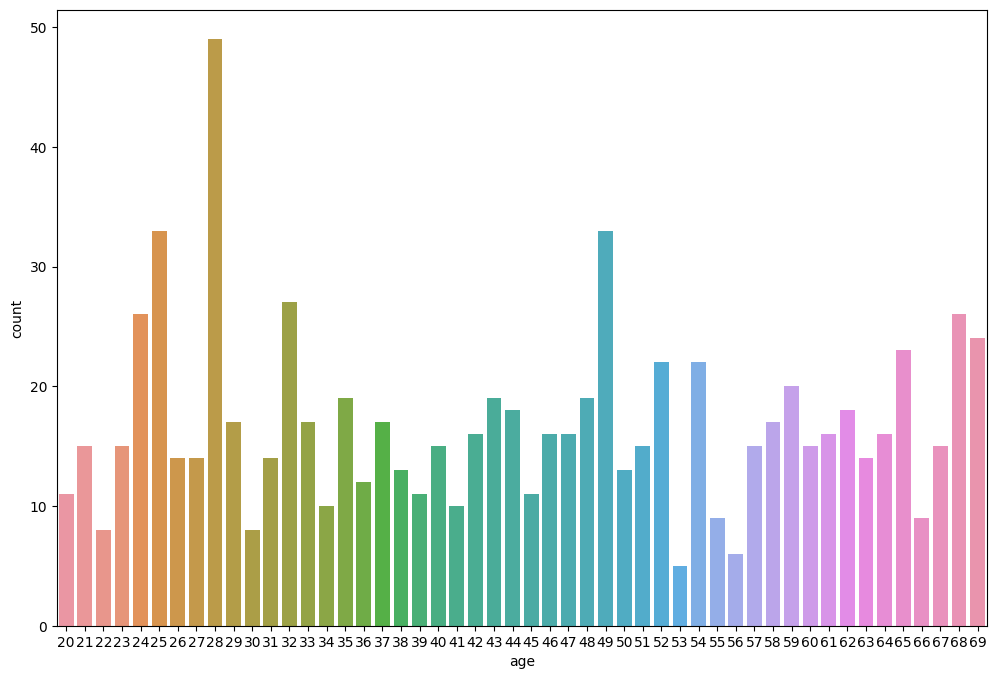

In [116]:
plt.figure(figsize=(12, 8))
sns.countplot(
    data = (
        logs
         .merge(user_data, on='client')
         .query("platform == 'computer' and success == True")
    ), 
    x='age'
)
# answer - 28